In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Font modification
#plt.rcParams['font.sans-serif'] = "Times New Roman"
#plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = 18

In [3]:
results = pd.DataFrame()
for file in [f for f in os.listdir('../data/') if f.startswith('res_') and f.endswith('.csv')]:
    df = pd.read_csv('../data/{}'.format(file), index_col=[0])
    results = pd.concat([results, df], axis=0, sort=False)
    
results['savgol__window_length'] = results['savgol__window_length']+1
results.fillna('NA', inplace=True)


#results.drop(['RMSE opt-rmse', 'R2 opt-rmse'], axis=1, inplace=True)
#results.rename(columns={'RMSE opt-r2':'RMSE', 'R2 opt-r2':'R2'}, inplace=True)
results.sort_values('RMSE test', inplace=True)
results.T

,elnet,SVM
alpha,0.0316228,NA
l1_ratio,1,NA
pca__n_components,26,28
savgol__deriv,2,2
savgol__polyorder,3,3
savgol__wavemax,1448,1502
savgol__wavemin,1068,1038
savgol__window_length,13,13
RMSE train,4.35128,4.36447
R2 train,0.760143,0.758687


# scores

In [4]:
# Sorted by RMSE
results[['RMSE test', 'RMSE train', 'R2 test', 'R2 train']]

,RMSE test,RMSE train,R2 test,R2 train
elnet,4.633598,4.351283,0.706535,0.760143
SVM,4.885098,4.364472,0.673814,0.758687


In [5]:
# PCA
results[['pca__n_components']]

,pca__n_components
elnet,26.0
SVM,28.0


In [6]:
# Savgol
results[[col for col in results.columns if col.startswith('savgol_')]]

,savgol__deriv,savgol__polyorder,savgol__wavemax,savgol__wavemin,savgol__window_length
elnet,2.0,3.0,1448.0,1068.0,13.0
SVM,2.0,3.0,1502.0,1038.0,13.0


In [7]:
# Accuracy
df = results[[col for col in results.columns if col.startswith('preds')]]
df = df*100
df

,preds +/-1,preds +/-2,preds +/-3,preds +/-4,preds +/-6,preds +/-8,preds +/-10
elnet,16.836735,32.653061,43.367347,58.673469,81.632653,91.326531,97.448980
SVM,15.816327,35.204082,47.959184,57.142857,79.591837,90.816327,95.408163


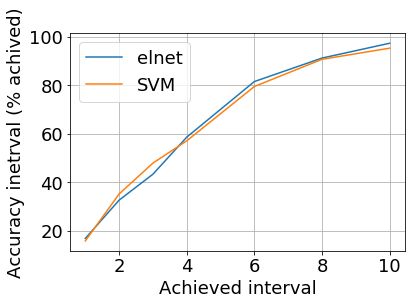

In [8]:

for acc in df.index:
    plt.plot([1,2,3,4,6,8,10], df.loc[acc].values, label=acc)
    #print(df.loc[acc].values)

plt.ylabel('Accuracy inetrval (% achived)')
plt.xlabel('Achieved interval')
plt.grid()
plt.legend()
plt.savefig('results - interval.png', bbox_inches = 'tight')
plt.show()

# Regularization

In [9]:
results[['alpha', 'l1_ratio', 'C', 'epsilon']]

,alpha,l1_ratio,C,epsilon
elnet,0.0316228,1,NA,NA
SVM,NA,NA,1.58489,1
